# Executive Summary

This project analyzes college sports attendance data from major universities and athletic conferences between 2020 and 2024. Using Python, pandas, and matplotlib, I cleaned and explored the dataset to uncover trends in total and average attendance across seasons, sports, and institutions.

### Key Findings:
- The **SEC** and **Big Ten** dominate in total attendance.
- **Kansas**, **Indiana**, and **Michigan** rank highest in university-wide fan turnout.
- Aggregating data avoids misleading duplicates — producing more reliable comparisons.
- Time-based trends show fluctuations tied to external factors and conference dynamics.

This analysis is valuable for stakeholders in college athletics, including sports marketers, event organizers, and university athletic departments.


In [80]:
import pandas as pd

In [81]:
df = pd.read_excel(r"C:\Users\rasha\Downloads\00\Sports_Attendance\Attendance.xlsx")


### Analysis: Most Attended Conferences

This bar chart shows the total attendance per athletic conference across all sports and seasons in the dataset. By grouping the data by `Conference` and summing the `Total Attendance`, we can see which conferences consistently drew the largest crowds. 

This is useful for identifying which conferences have the strongest fan bases or largest programs in terms of home-game attendance.

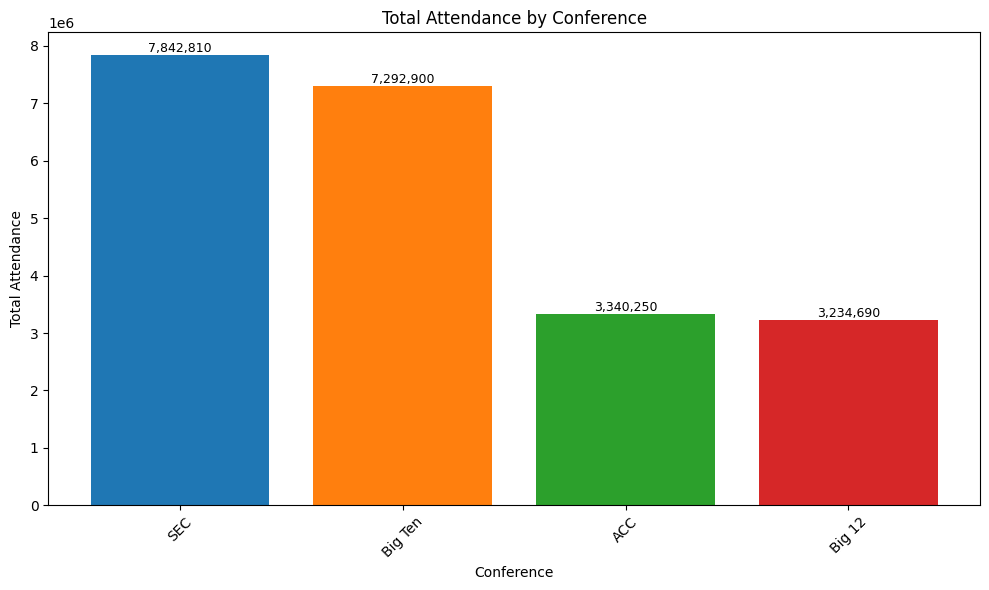

In [83]:
import matplotlib.pyplot as plt

# Group and sort
df_group = df.groupby('Conference')['Total_Attendance'].sum().sort_values(ascending=False)

# Generate a color for each bar
colors = plt.cm.tab10(range(len(df_group)))  # tab10 = nice 10-color palette

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(df_group.index, df_group.values, color=colors)
plt.title('Total Attendance by Conference')
plt.ylabel('Total Attendance')
plt.xlabel('Conference')
plt.xticks(rotation=45)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Top 10 Universities by Total Attendance (All Sports & Seasons)

This bar chart presents the top 10 universities with the highest **cumulative total home-game attendance**, aggregated across all sports and all seasons in the dataset.

Unlike raw row-based sorting, this visualization uses grouped and summed attendance figures, ensuring each university is only represented once. This approach provides a more accurate view of which institutions consistently draw the largest crowds regardless of sport or year.

It reveals the universities with the strongest fan base and broadest appeal across their athletics programs, which is especially useful for strategic planning, sponsorship opportunities, and resource allocation within athletic departments.


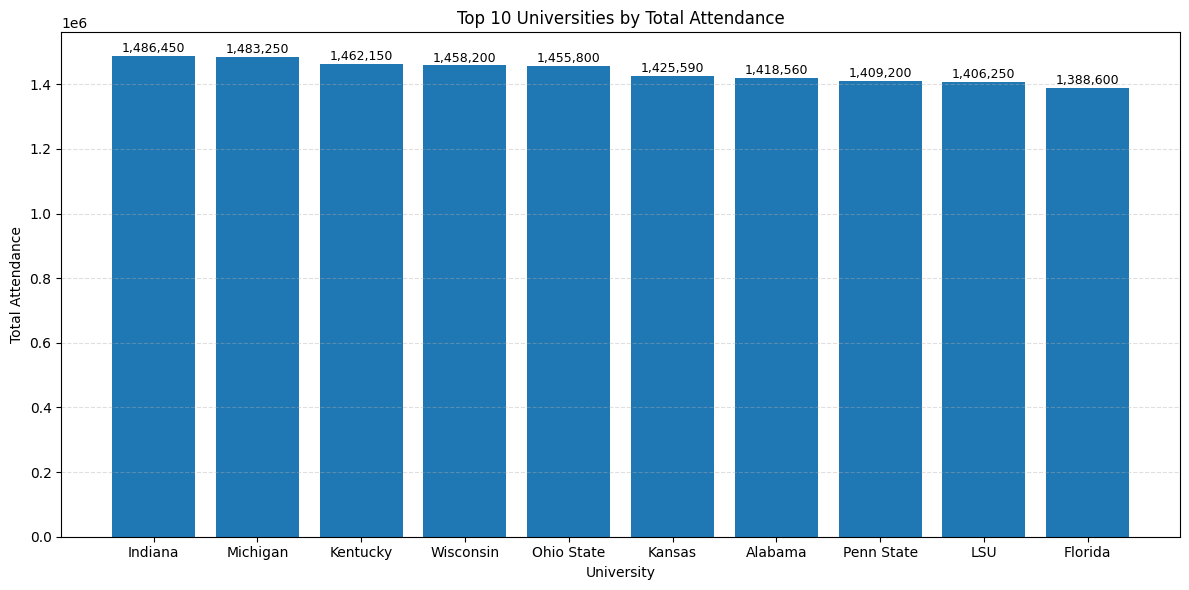

In [84]:
import matplotlib.pyplot as plt

# Step 1: Group by university and sum attendance across sports/seasons
top10_uni = df.groupby('University')['Total_Attendance'].sum().sort_values(ascending=False).head(10)

# Step 2: Plot vertical bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(top10_uni.index, top10_uni.values, color='#1f77b4')

# Step 3: Add labels above each bar
for bar in bars:
    height = bar.get_height()
    label = f'{int(height):,}'
    ax.text(bar.get_x() + bar.get_width()/2,
            height + 3000,
            label,
            ha='center', va='bottom', fontsize=9)

# Step 4: Styling
ax.set_title('Top 10 Universities by Total Attendance')
ax.set_ylabel('Total Attendance')
ax.set_xlabel('University')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Total Attendance Trends by Sport

This line chart displays total attendance for each sport over time, offering a direct comparison of fan turnout season by season. 

It helps identify which sports are increasing or declining in popularity based on audience size, and allows us to spot anomalies—such as dips due to external events (e.g., pandemic restrictions) or surges due to high-profile seasons.

This is useful for sports marketers, athletic departments, and analysts looking to optimize programming and scheduling.


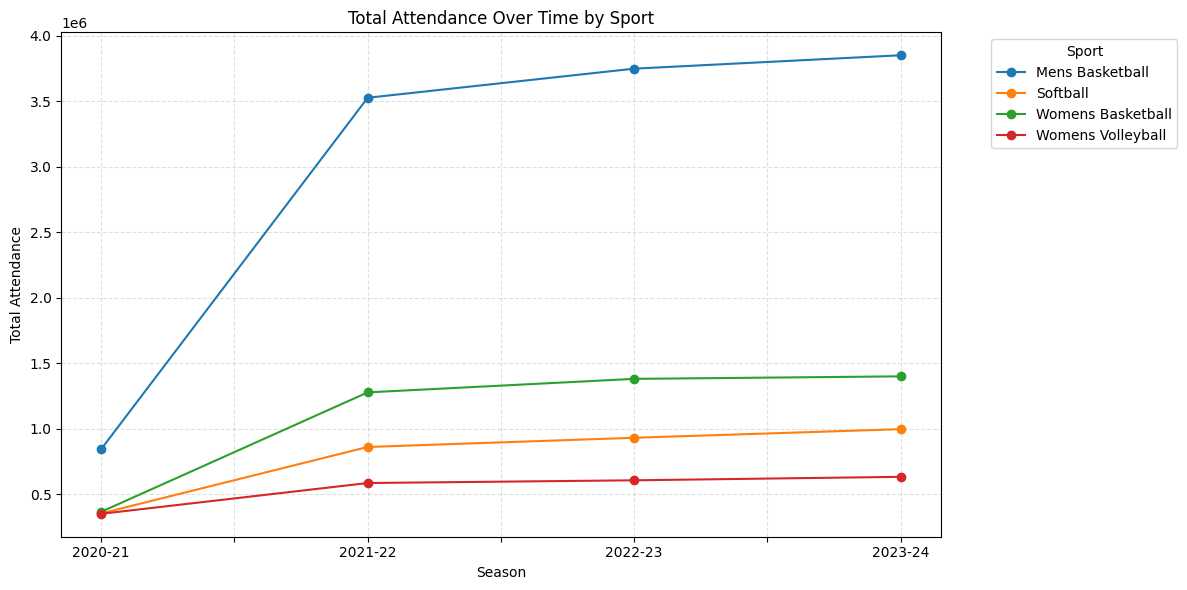

In [85]:
# Group by Season and Sport, sum attendance
sport_trends = df.groupby(['Season', 'Sport'])['Total_Attendance'].sum().unstack()

# Plot
sport_trends.plot(figsize=(12, 6), marker='o')
plt.title('Total Attendance Over Time by Sport')
plt.xlabel('Season')
plt.ylabel('Total Attendance')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


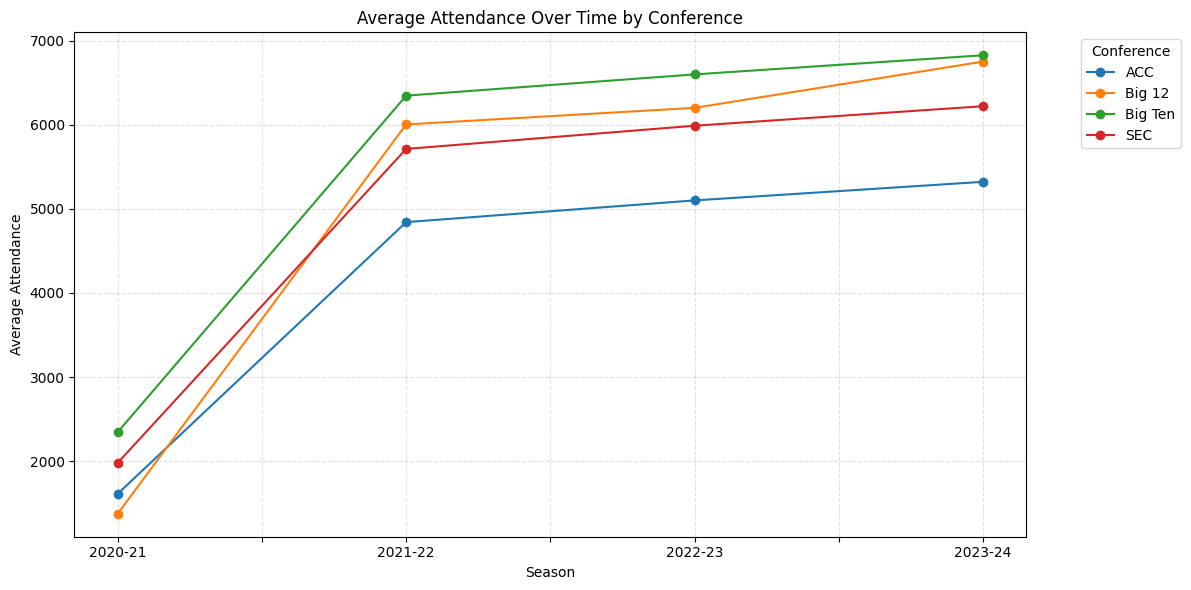

In [86]:
# Group by Season and Conference, average attendance
conf_trends = df.groupby(['Season', 'Conference'])['Average_Attendance'].mean().unstack()

# Plot
conf_trends.plot(figsize=(12, 6), marker='o')
plt.title('Average Attendance Over Time by Conference')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Conference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Key Takeaways

- The SEC and Big Ten dominate in total attendance.
- Kansas, Indiana, and Michigan lead individual university attendance.
- Year-over-year trends and sport-level patterns could provide deeper insights in future iterations.
